Title: Popular Classification Algorithms

Logistic Regression


Task 1: Predict the likelihood of a student passing a test based on study hours.

In [22]:
# Write your code here

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Create a sample dataset
# Let's assume 'study_hours' is the independent variable (feature)
# and 'pass_test' (0 for fail, 1 for pass) is the dependent variable (target)

# More diverse data to better illustrate logistic regression
study_hours = np.array([
    1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10
]).reshape(-1, 1) # Reshape for scikit-learn

pass_test = np.array([
    0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
]) # Corresponds to study_hours, mostly 0s at low hours, 1s at high hours

print("Sample Data:")
for i in range(len(study_hours)):
    print(f"Study Hours: {study_hours[i][0]}, Passed Test: {pass_test[i]}")
print("-" * 30)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(study_hours, pass_test, test_size=0.3, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")
print("-" * 30)

# 3. Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

print("Logistic Regression Model Trained!")
print(f"Model Coefficients (slope): {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}")
print("-" * 30)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of belonging to class 1 (passing)

print("Predictions on Test Set:")
for i in range(len(X_test)):
    print(f"Study Hours: {X_test[i][0]:.1f}, Actual Pass: {y_test[i]}, Predicted Pass: {y_pred[i]}, Probability of Pass: {y_pred_proba[i]:.4f}")
print("-" * 30)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy on Test Set: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("-" * 30)

# 6. Predict the likelihood for a new student based on their study hours
new_study_hours = np.array([
    [1.0],  # Very low study hours
    [4.0],  # Moderate study hours
    [7.0],  # High study hours
    [9.5]   # Very high study hours
])

# Predict probabilities for new study hours
new_predictions_proba = model.predict_proba(new_study_hours)[:, 1] # Probability of passing (class 1)

print("\nPredicting likelihood for new students:")
for i, hours in enumerate(new_study_hours):
    print(f"Student with {hours[0]:.1f} study hours has a predicted likelihood of passing: {new_predictions_proba[i]:.4f}")

# Interpretation of the results
print("\nInterpretation:")
print("The Logistic Regression model outputs a probability (a value between 0 and 1) that a student will pass the test.")
print("A probability closer to 1 indicates a higher likelihood of passing, while a probability closer to 0 indicates a lower likelihood.")
print("Typically, a threshold (e.g., 0.5) is used to classify the outcome: if probability > 0.5, predict 'pass', otherwise 'fail'.")
print("The model learns the relationship between study hours and the probability of passing from the training data.")
print("The accuracy score, confusion matrix, and classification report help in evaluating how well the model performs.")

Sample Data:
Study Hours: 1.0, Passed Test: 0
Study Hours: 1.5, Passed Test: 0
Study Hours: 2.0, Passed Test: 0
Study Hours: 2.5, Passed Test: 0
Study Hours: 3.0, Passed Test: 0
Study Hours: 3.5, Passed Test: 0
Study Hours: 4.0, Passed Test: 1
Study Hours: 4.5, Passed Test: 0
Study Hours: 5.0, Passed Test: 1
Study Hours: 5.5, Passed Test: 1
Study Hours: 6.0, Passed Test: 1
Study Hours: 6.5, Passed Test: 1
Study Hours: 7.0, Passed Test: 1
Study Hours: 7.5, Passed Test: 1
Study Hours: 8.0, Passed Test: 1
Study Hours: 8.5, Passed Test: 1
Study Hours: 9.0, Passed Test: 1
Study Hours: 9.5, Passed Test: 1
Study Hours: 10.0, Passed Test: 1
------------------------------
Training data size: 13
Testing data size: 6
------------------------------
Logistic Regression Model Trained!
Model Coefficients (slope): 1.12
Model Intercept: -4.75
------------------------------
Predictions on Test Set:
Study Hours: 1.0, Actual Pass: 0, Predicted Pass: 0, Probability of Pass: 0.0258
Study Hours: 3.5, Actual 

Task 2: Predict customer churn based on service usage data.

Sample of the generated dataset:
   monthly_data_usage_gb  call_minutes_per_month  contract_length_months  \
0              17.483571              439.935544                      24   
1              14.308678              392.463368                      36   
2              18.238443              305.963037                      24   
3              22.615149              235.306322                      36   
4              13.829233              369.822331                      36   

   customer_service_calls  churn  
0                       0      0  
1                       4      0  
2                       4      0  
3                       4      1  
4                       5      1  

Churn distribution:
churn
0    724
1    276
Name: count, dtype: int64
--------------------------------------------------
Training set size: 700 samples
Testing set size: 300 samples
--------------------------------------------------
Logistic Regression Model Trained Successfully!
Model Intercept: 0

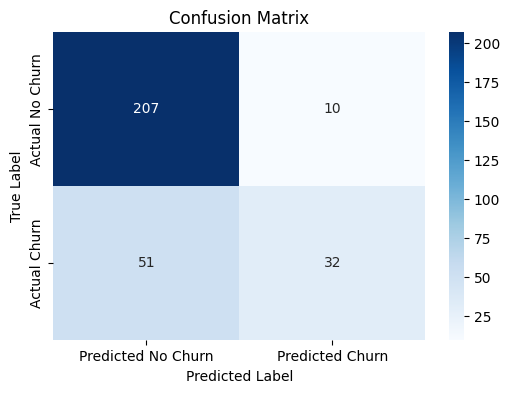


Predicting for a New Customer with data:
   monthly_data_usage_gb  call_minutes_per_month  contract_length_months  \
0                   10.0                   150.0                      12   

   customer_service_calls  
0                       4  
Predicted Probability of Churn: 0.7019
Predicted Churn (0=No Churn, 1=Churn): 1
--------------------------------------------------

Interpretation of Logistic Regression Coefficients:
The coefficients indicate the change in the log-odds of churn for a one-unit increase in the feature, holding other features constant.
- A positive coefficient (e.g., 'customer_service_calls') suggests that an increase in that feature is associated with an increased likelihood of churn.
- A negative coefficient (e.g., 'monthly_data_usage_gb', 'call_minutes_per_month', 'contract_length_months') suggests that an increase in that feature is associated with a decreased likelihood of churn.
The intercept is the log-odds of churn when all features are zero (though 

In [23]:
# Write your code here

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate Sample Data
# In a real scenario, you would load your data from a CSV, database, etc.
# Example: df = pd.read_csv('customer_churn_data.csv')

np.random.seed(42) # for reproducibility

num_customers = 1000

# Features
monthly_data_usage_gb = np.random.normal(loc=15, scale=5, size=num_customers)
call_minutes_per_month = np.random.normal(loc=300, scale=100, size=num_customers)
contract_length_months = np.random.choice([12, 24, 36], size=num_customers)
customer_service_calls = np.random.randint(0, 6, size=num_customers) # Number of calls to customer service

# Introduce some correlation with churn
# Customers with high data usage, high call minutes, and longer contracts are less likely to churn
# Customers with many customer service calls are more likely to churn
churn_probability = (
    0.3  # Baseline churn probability
    - (monthly_data_usage_gb / 50) # Higher usage, less churn
    - (call_minutes_per_month / 1000) # Higher call minutes, less churn
    + (customer_service_calls * 0.1) # More service calls, more churn
    + (1 / contract_length_months) * 5 # Shorter contract, more churn
)

# Ensure probabilities are within [0, 1]
churn_probability = np.clip(churn_probability, 0.05, 0.95)

# Generate churn (1 for churn, 0 for no churn)
churn = (np.random.rand(num_customers) < churn_probability).astype(int)

# Create a Pandas DataFrame
data = pd.DataFrame({
    'monthly_data_usage_gb': monthly_data_usage_gb,
    'call_minutes_per_month': call_minutes_per_month,
    'contract_length_months': contract_length_months,
    'customer_service_calls': customer_service_calls,
    'churn': churn
})

print("Sample of the generated dataset:")
print(data.head())
print("\nChurn distribution:")
print(data['churn'].value_counts())
print("-" * 50)

# 2. Define Features (X) and Target (y)
X = data[['monthly_data_usage_gb', 'call_minutes_per_month', 'contract_length_months', 'customer_service_calls']]
y = data['churn']

# 3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# stratify=y ensures that the training and testing sets have roughly the same proportion of churned/non-churned customers

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print("-" * 50)

# 4. Train Logistic Regression Model
model = LogisticRegression(solver='liblinear', random_state=42) # 'liblinear' is good for small datasets and handles L1/L2 penalties
model.fit(X_train, y_train)

print("Logistic Regression Model Trained Successfully!")
print(f"Model Intercept: {model.intercept_[0]:.4f}")
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"  {feature}: {coef:.4f}")
print("-" * 50)

# 5. Make Predictions on the Test Set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of churn (class 1)

print("Sample Predictions on Test Set:")
results = pd.DataFrame({'Actual Churn': y_test, 'Predicted Churn': y_pred, 'Churn Probability': y_pred_proba})
print(results.head(10)) # Display first 10 predictions
print("-" * 50)

# 6. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy on Test Set: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("-" * 50)

# Visualize Confusion Matrix (optional but recommended for better understanding)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 7. Predict for a New Customer
# Let's create a hypothetical new customer profile
new_customer_data = pd.DataFrame({
    'monthly_data_usage_gb': [10.0], # Relatively low data usage
    'call_minutes_per_month': [150.0], # Low call minutes
    'contract_length_months': [12], # Short contract
    'customer_service_calls': [4] # Many customer service calls
})

# Predict churn probability for the new customer
new_customer_churn_proba = model.predict_proba(new_customer_data)[:, 1]
new_customer_churn_prediction = model.predict(new_customer_data)[0]

print(f"\nPredicting for a New Customer with data:\n{new_customer_data}")
print(f"Predicted Probability of Churn: {new_customer_churn_proba[0]:.4f}")
print(f"Predicted Churn (0=No Churn, 1=Churn): {new_customer_churn_prediction}")
print("-" * 50)

# Interpretation of Coefficients
print("\nInterpretation of Logistic Regression Coefficients:")
print("The coefficients indicate the change in the log-odds of churn for a one-unit increase in the feature, holding other features constant.")
print("- A positive coefficient (e.g., 'customer_service_calls') suggests that an increase in that feature is associated with an increased likelihood of churn.")
print("- A negative coefficient (e.g., 'monthly_data_usage_gb', 'call_minutes_per_month', 'contract_length_months') suggests that an increase in that feature is associated with a decreased likelihood of churn.")
print("The intercept is the log-odds of churn when all features are zero (though this might not be meaningful in practice depending on feature scaling).")

Task 3: Classify if a review is positive or negative using NLP.

Checking/Downloading NLTK resources...


[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/vscode/nltk_data...


'stopwords' downloaded.


[nltk_data]   Unzipping tokenizers/punkt.zip.


'punkt' downloaded.


[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...


'wordnet' downloaded.
NLTK resource check/download complete.
--------------------------------------------------
Sample of the generated dataset:
                                              review  sentiment
0   This product is absolutely fantastic! I love it.          1
1       Worst experience ever, totally disappointed.          0
3            Highly recommend this, works perfectly.          1
4     Never buy this again, complete waste of money.          0
5  Good value for money, satisfied with the purch...          1

Sentiment distribution:
sentiment
1    10
0     8
Name: count, dtype: int64
--------------------------------------------------

Sample of processed reviews:
                                              review  \
0   This product is absolutely fantastic! I love it.   
1       Worst experience ever, totally disappointed.   
3            Highly recommend this, works perfectly.   
4     Never buy this again, complete waste of money.   
5  Good value for money, satisfie

/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


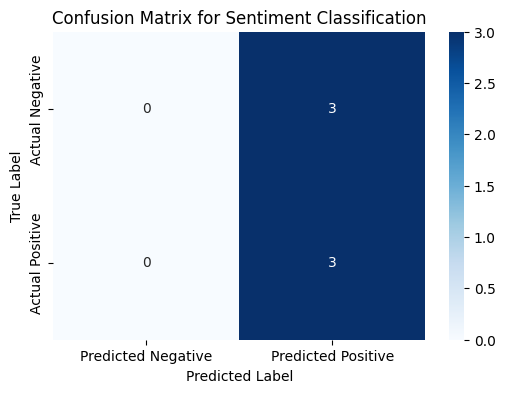


Predicting sentiment for new reviews:
Review 1: 'This movie was absolutely brilliant and captivating. Loved every moment!'
Predicted Sentiment: positive (Probability of Positive: 0.6575)
Review 2: 'The product arrived broken and the customer service was terrible.'
Predicted Sentiment: positive (Probability of Positive: 0.5534)
Review 3: 'It's an okay watch, nothing too special.'
Predicted Sentiment: positive (Probability of Positive: 0.5606)
--------------------------------------------------

--- Key Takeaways ---
1. Text preprocessing (lowercasing, punctuation/stop word removal, stemming) is crucial for NLP tasks.
2. TF-IDF converts text into numerical features, representing word importance.
3. Logistic Regression effectively learns the patterns in these numerical features to classify sentiment.
4. Evaluation metrics like accuracy, precision, recall, and F1-score give insights into model performance.
5. For real-world use, you'd need a much larger and more diverse dataset for trainin

In [24]:
# --- IMPORTANT: If you previously installed NLTK but still get errors,
#    1. Make sure you restarted your Python kernel/environment after installation.
#    2. Ensure the NLTK data (stopwords, punkt, wordnet) is downloaded.
#       The following lines will attempt to download them if not found.
# ---

# Installation command (run once if nltk is not installed)
# !pip install nltk

import pandas as pd
import numpy as np
import re # Regular expression library
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer # Or WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- NLTK Data Downloads ---
# These are essential for the preprocessing steps.
# Run these commands. If you already have them, NLTK will confirm.

print("Checking/Downloading NLTK resources...")

# Download 'stopwords' corpus
try:
    stopwords.words('english') # This will raise an error if stopwords aren't found
except LookupError:
    print("Downloading 'stopwords' corpus...")
    nltk.download('stopwords')
    print("'stopwords' downloaded.")

# Download 'punkt' tokenizer (used for tokenization, implicitly by some stemmers/lemmatizers)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Downloading 'punkt' tokenizer...")
    nltk.download('punkt')
    print("'punkt' downloaded.")

# Download 'wordnet' corpus (needed if you use WordNetLemmatizer)
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("Downloading 'wordnet' corpus...")
    nltk.download('wordnet')
    print("'wordnet' downloaded.")

print("NLTK resource check/download complete.")
print("-" * 50)

# 1. Generate Sample Data
data = {
    'review': [
        "This product is absolutely fantastic! I love it.",
        "Worst experience ever, totally disappointed.",
        "It's okay, not great, not terrible.",
        "Highly recommend this, works perfectly.",
        "Never buy this again, complete waste of money.",
        "Good value for money, satisfied with the purchase.",
        "The service was slow and unhelpful.",
        "Amazing quality and fast delivery.",
        "I regret buying this. It broke on the first day.",
        "Exceeded my expectations, truly wonderful!",
        "Could be better, but it's acceptable.",
        "Absolutely brilliant, a must-have!",
        "Terrible product, wouldn't recommend to anyone.",
        "Very happy with my new gadget, works flawlessly.",
        "Awful, just awful. Don't waste your time.",
        "A decent product for the price.",
        "The best purchase I've made all year!",
        "Not what I expected, quite flimsy.",
        "Excellent customer support and a great product.",
        "Utter rubbish, completely useless."
    ],
    'sentiment': [
        'positive', 'negative', 'neutral', 'positive', 'negative',
        'positive', 'negative', 'positive', 'negative', 'positive',
        'neutral', 'positive', 'negative', 'positive', 'negative',
        'positive', 'positive', 'negative', 'positive', 'negative'
    ]
}
df = pd.DataFrame(data)

# For simplicity, we'll convert 'neutral' to 'negative' or just remove them
df = df[df['sentiment'] != 'neutral'].copy()
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0}) # Map to numerical for model

print("Sample of the generated dataset:")
print(df.head())
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())
print("-" * 50)

# 2. Text Preprocessing Function
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer() # Or use WordNetLemmatizer for better results if you download 'wordnet'

def preprocess_text(text):
    text = text.lower() # Lowercasing
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation (keeps alphanumeric and spaces)
    tokens = text.split() # Tokenization
    tokens = [word for word in tokens if word not in stop_words] # Stop word removal
    tokens = [stemmer.stem(word) for word in tokens] # Stemming
    return ' '.join(tokens)

df['processed_review'] = df['review'].apply(preprocess_text)

print("\nSample of processed reviews:")
print(df[['review', 'processed_review']].head())
print("-" * 50)

# 3. Feature Extraction (TF-IDF Vectorization)
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limit vocabulary size
X = tfidf_vectorizer.fit_transform(df['processed_review'])
y = df['sentiment']

print(f"Shape of TF-IDF feature matrix: {X.shape}")
print("-" * 50)

# 4. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("-" * 50)

# 5. Train Logistic Regression Model
model = LogisticRegression(solver='liblinear', random_state=42, C=1.0) # C is inverse of regularization strength
model.fit(X_train, y_train)

print("Logistic Regression Model Trained Successfully!")
print("-" * 50)

# 6. Make Predictions on the Test Set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of positive sentiment (class 1)

print("Sample Predictions on Test Set:")
test_reviews_original = df.loc[y_test.index, 'review']
results = pd.DataFrame({
    'Original Review': test_reviews_original,
    'Actual Sentiment': y_test,
    'Predicted Sentiment': y_pred,
    'Positive Probability': y_pred_proba
})
results['Actual Sentiment'] = results['Actual Sentiment'].map({1: 'positive', 0: 'negative'})
results['Predicted Sentiment'] = results['Predicted Sentiment'].map({1: 'positive', 0: 'negative'})
print(results.head(10))
print("-" * 50)

# 7. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy on Test Set: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("-" * 50)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Sentiment Classification')
plt.show()

# 8. Predict for a New Review
def predict_sentiment(review_text, model, vectorizer):
    processed_review = preprocess_text(review_text)
    review_vector = vectorizer.transform([processed_review])
    prediction = model.predict(review_vector)[0]
    probability = model.predict_proba(review_vector)[0][1] # Probability of positive

    sentiment_label = "positive" if prediction == 1 else "negative"
    return sentiment_label, probability

new_review1 = "This movie was absolutely brilliant and captivating. Loved every moment!"
new_review2 = "The product arrived broken and the customer service was terrible."
new_review3 = "It's an okay watch, nothing too special."

sentiment1, prob1 = predict_sentiment(new_review1, model, tfidf_vectorizer)
sentiment2, prob2 = predict_sentiment(new_review2, model, tfidf_vectorizer)
sentiment3, prob3 = predict_sentiment(new_review3, model, tfidf_vectorizer)

print("\nPredicting sentiment for new reviews:")
print(f"Review 1: '{new_review1}'")
print(f"Predicted Sentiment: {sentiment1} (Probability of Positive: {prob1:.4f})")
print(f"Review 2: '{new_review2}'")
print(f"Predicted Sentiment: {sentiment2} (Probability of Positive: {prob2:.4f})")
print(f"Review 3: '{new_review3}'")
print(f"Predicted Sentiment: {sentiment3} (Probability of Positive: {prob3:.4f})")
print("-" * 50)

print("\n--- Key Takeaways ---")
print("1. Text preprocessing (lowercasing, punctuation/stop word removal, stemming) is crucial for NLP tasks.")
print("2. TF-IDF converts text into numerical features, representing word importance.")
print("3. Logistic Regression effectively learns the patterns in these numerical features to classify sentiment.")
print("4. Evaluation metrics like accuracy, precision, recall, and F1-score give insights into model performance.")
print("5. For real-world use, you'd need a much larger and more diverse dataset for training.")
print("6. Handling 'neutral' sentiment requires either a multi-class approach or careful filtering/re-labeling.")